(array([   2.,   12.,   10.,   31.,   64.,  120.,  196.,  336.,  473.,
        756., 1551., 1451., 1657., 1852., 1949., 1899., 1793., 1610.,
       1280.,  994., 1014.,  405.,  263.,  120.,   77.,   45.,   22.,
         11.,    4.,    3.]), array([-55. , -44.5, -34. , -23.5, -13. ,  -2.5,   8. ,  18.5,  29. ,
        39.5,  50. ,  60.5,  71. ,  81.5,  92. , 102.5, 113. , 123.5,
       134. , 144.5, 155. , 165.5, 176. , 186.5, 197. , 207.5, 218. ,
       228.5, 239. , 249.5, 260. ]), <a list of 30 Patch objects>)
[-49.75 -39.25 -28.75 -18.25  -7.75   2.75  13.25  23.75  34.25  44.75
  55.25  65.75  76.25  86.75  97.25 107.75 118.25 128.75 139.25 149.75
 160.25 170.75 181.25 191.75 202.25 212.75 223.25 233.75 244.25 254.75]
[1986.00941387   42.75279089] [[ 2.30345187e+03 -3.30590304e+01]
 [-3.30590304e+01  1.42332599e+00]]


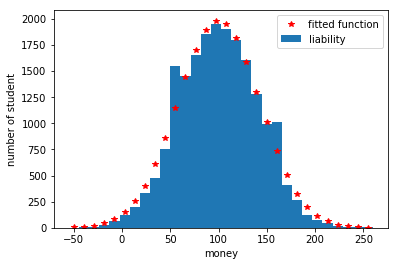

In [22]:
import numpy as np
import matplotlib.pyplot as plt


n=20000
m=100
dm=5
k=1000000

'''
n=int(input("n:"))
m=int(input("m:"))
dm=int(input("dm:"))
k=int(input("k:"))
'''

s1=np.full(n,m)

def pss1(s,dM) :
    a=np.random.randint(0,len(s))
    b=np.random.randint(0,len(s))
    
    a_h=np.random.randint(0,3)
    b_h=np.random.randint(0,3)
    
    if (a_h==2 and b_h==1) or (a_h==1 and b_h==0) or (a_h==0 and b_h==2) :
        s[a] += dM
        s[b] -= dM
        
    elif (a_h==0 and b_h==1) or (a_h==1 and b_h==2) or (a_h==2 and b_h==0) :
        s[a] -= dM
        s[b] += dM
        
    else :
        pass
    
    return s


for x in range(k) :
    s1 = pss1(s1,dm)

'''
plt.hist(s1,bins=20,label='liability')
plt.legend(loc="best")
plt.show()
'''

pic=plt.hist(s1,bins=30,label='liability')
print(pic)
dx=(pic[1][1]-pic[1][0])
bin_center=np.array(pic[1][0:-1])+dx/2.
print(bin_center)

from scipy import optimize

def test_func(x,amp,sigma) :
    return amp * np.exp(-(x-m)**2/(2*sigma**2))

params, params_convariance = optimize.curve_fit(test_func, bin_center, pic[0])
print(params, params_convariance)
plt.plot(bin_center, test_func(bin_center, params[0],params[1]),"r*",label='fitted function')

plt.xlabel("money")
plt.ylabel("number of student")
plt.legend(loc="best")
plt.show()

n:20000
m:50
dm:5
k:1200000


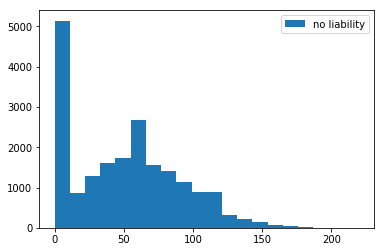

In [5]:
import numpy as np
import matplotlib.pyplot as plt

'''
n=20000
m=50
dm=5
k=500000
'''

n=int(input("n:"))
m=int(input("m:"))
dm=int(input("dm:"))
k=int(input("k:"))

s2=np.full(n,m)

def pss2(s,dM) :
    a=np.random.randint(0,len(s))
    b=np.random.randint(0,len(s))
    
    if s[a]<=0 or s[b]<=0 :
        pass
    
    else :
        a_h=np.random.randint(0,3)
        b_h=np.random.randint(0,3)
        
        if (a_h==2 and b_h==1) or (a_h==1 and b_h==0) or (a_h==0 and b_h==2) :
            s[a] += dM
            s[b] -= dM
        
        elif (a_h==0 and b_h==1) or (a_h==1 and b_h==2) or (a_h==2 and b_h==0) :
            s[a] -= dM
            s[b] += dM
        
        else :
            pass
    
    return s

for x in range(k) :
    s2 = pss2(s2,dm)
    
plt.hist(s2,bins=20,label='no liability')
plt.legend(loc="best")
plt.show()  